

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Intro to Classification + KNN
Week 4 | Lesson 4.01


![](https://snag.gy/RKWYcC.jpg)

### KNN CODEALONG OBJECTIVES
*In this notebook, we will:*
- Quickly review types of ML problem
- Implement a visualization of KNN on some made-up data 
- Deploy the sklearn implementation of KNN on the Iris dataset together
- And deploy KNN on the Wisconsin Breast Cancer dataset individually
---

## Classification Review

![](https://snag.gy/0Jns5x.jpg)

Classifcation methods in machine learning are **supervised methods**.  That is, our training data observations have a discrete or categorical label designating their class.  

Classification is different than regression (with continuous values) because we are now predicting classes / labels.  This can be thought of as a discrimination problem, modelling the differences or similarities between groups. 

We also assess our models differently in classification than in regression.  Generally, we are concerned with if we identified anything incorrectly, completely missed the mark, or predicted correctly on our test set during cross validation.  There are a few different things we usually talk about and look at when it pertains to classification related to these ideas such as **accuracy**, **recall**, **precision**, **F-measures**, **class imbalance**, and **Reciever Operating Characteristic (ROC)**.

For our purposes right now, we're only looking at accuracy which is:

## $$ \frac{True Positives + True Negatives}{Total Pos + Total Neg} $$

# K Nearest Neighbors Classification, Visually

For our first exercise, we are going to look at how the kNN algorithm classifies an unknown point using a randomly generated dataset.

---

## kNN

![](https://snag.gy/hatSE6.jpg)

The pseudocode algorithm for kNN is as follows:



```
for unclassified_point in sample:
    for known_point in known_class_points:
        calculate distances (euclidean or other) between known_point and unclassified_point
    for k in range of specified_neighbors_number:
        find k_nearest_points in known_class_points to unclassified_point
    assign class to unclassified_point using "votes" from k_nearest_points
```
> ### Common KNN Distance Functions
> These distance functions can be used with KNN.  Euclidean is the most common choice.
>
> ### Euclidean  
> $\sqrt{\sum\limits_{i=1}^k(x_i - y_i)^2}$
>
> ### Manattan 
> $\sum\limits_{i=1}^k \left| x_i - y_i \right|$
>
> ### Minkowski
> $\left(\sum_{i=1}^n |x_i-y_i|^p\right)^{1/p}$

---

<a id='euclidean'></a>
## Euclidean distance

---
KNN typically uses one of two distance metrics: euclidean or manhattan. Other distance metrics are possible, but more rare (sometimes it makes sense to create your own distance function).


Recal the famous Pythagorean Theorem
![Alt text](http://ncalculators.com/images/pythagoras-theorem.gif)

We can apply the theorem to calculate distance between points. This is called Euclidean distance. 

![Alt text](http://rosalind.info/media/Euclidean_distance.png)

### $$\text{Euclidean  distance}=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$$

There are many different distance metrics, but Euclidean is the most common (and default in sklearn).


## A Basic Example

A basic example first, using a randomly generated dataset having 2 classes.  If we were to predict new points, we need to know where our current observations exist in 2D space.


In [45]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_biclusters
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler

sns.set(font_scale=2.5)

%matplotlib inline

In [14]:
## Geneate 2 random clusters, create dataframe
X, classes, cols= make_biclusters(shape=(100,2), # features (row,cols)
                                   n_clusters=2, # how many classes
                                   noise=50,# The standard deviation of the gaussian noise.
                                   random_state=42)

# Return
# X : array of shape=(100,2)
# classes : array of shape (n_clusters, # classes no
#                           X.shape[0]) # number of rows
# cols : array of shape (n_clusters,
#                        X.shape[1]) # data frames columns
# The indicators for cluster membership of each column.

In [9]:
X

In [1]:
classes

In [15]:
df = pd.DataFrame(X, columns=['hight','width'])
df['target']= classes[0]
df['target'] = df['target'].map(lambda t: 'class 1' if t==0 else 'class 0')

In [16]:
df.head()

,hight,width,target
0,102.857380,52.182233,class 1
1,95.761153,62.605172,class 1
2,121.886696,147.757318,class 1
3,17.275897,-132.758802,class 0
4,-14.597634,63.686681,class 0


### Predicting a "new" unknown point

Predicting a new point using the **KNN** algorithm, is as follows:

1. Calculate the distance of the new point (labeled: "X")
1. $K$ closest points, vote for the ownership of the new point
1. New point assigned to majority vote class

>  _Let's hold our questions about what happens two classes have the same votes!  We'll get to the edge cases soon!_


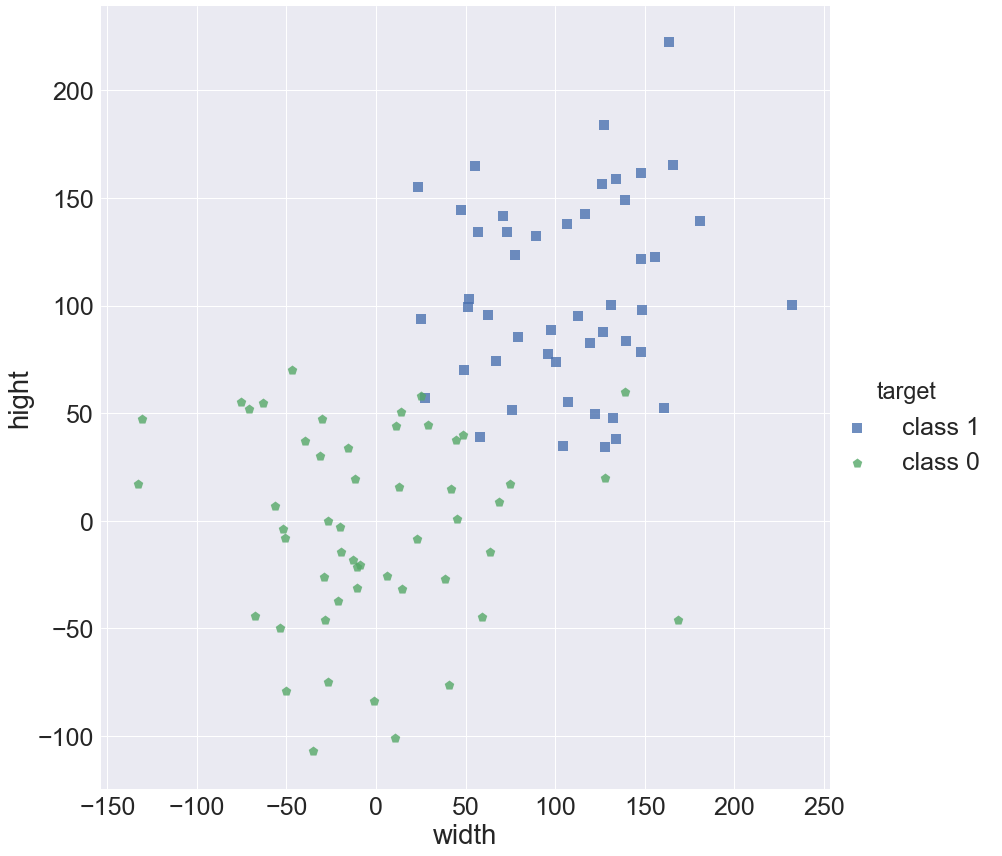

In [17]:
# Plot scatter with 2 classes
sns.lmplot('width',
           'hight',
           markers=['s','p'],   ## different maker for each hue in sns.lmplot ( shape of points )
           data=df,
           fit_reg=False,
           hue='target',
           size=12,
           scatter_kws={'s':100}); ##  change the size of the markers

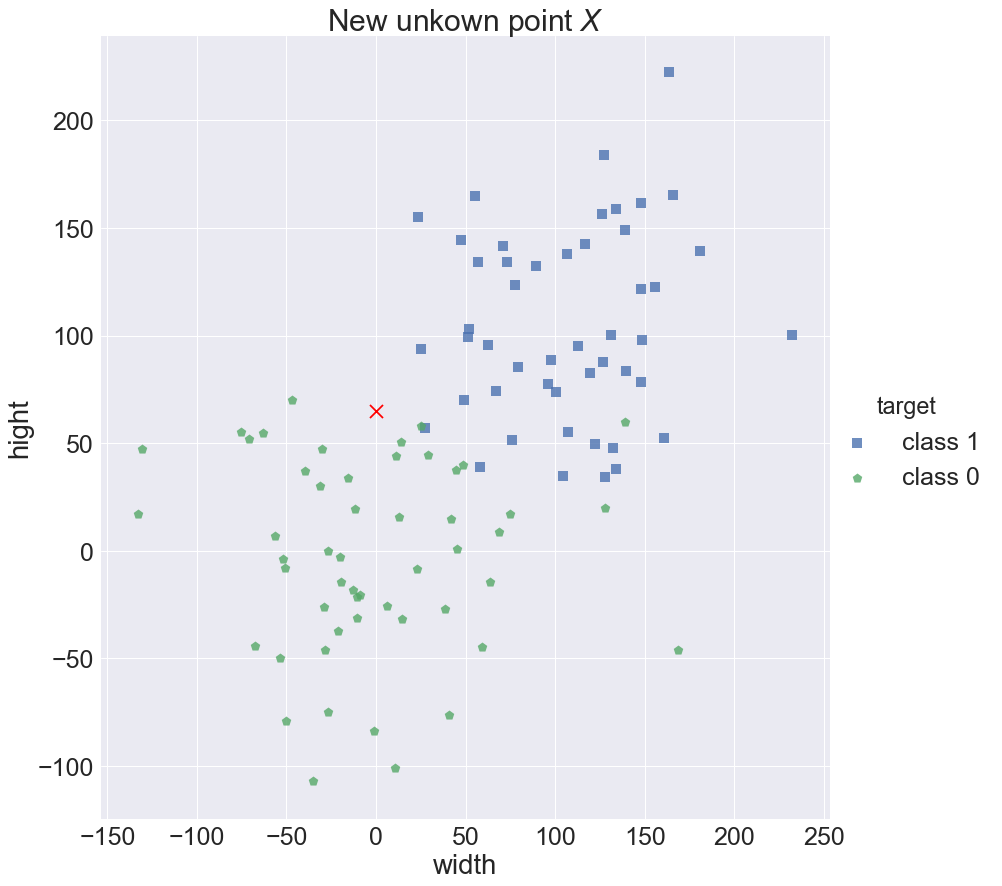

In [18]:
# Plot scatter with 2 classes
sns.lmplot('width',
           'hight',
           markers=['s','p'],  
           data=df,
           fit_reg=False,
           hue='target',
           size=12,
           scatter_kws={'s':100});

# Plot our new point
plt.title('New unkown point $X$')
plt.scatter(0, 65, color="red", marker="x", s=170);
# Plot distance lines to all points to new unknown point!

### Calculate the distances from every point to our unknown point "X"

In [26]:
from sklearn.metrics import pairwise_distances

In [27]:
# Compute the distance from new point to all datframe points
df['distance'] = pairwise_distances([[0,65]], df[['width','hight']])[0] # its only one columns
df.sort_values('distance').head()
## what is pairwise_distances

,hight,width,target,distance
9,50.525764,13.952065,class 0,20.103821
52,44.088052,10.931916,class 0,23.596956
5,57.909333,25.072417,class 0,26.055779
81,56.975250,27.070735,class 1,28.235107
8,47.371991,-30.012693,class 0,34.806729


### Select only the "k" closest points
The closest "k" points are considered for voting.  In this case let's select 11, for our "K".

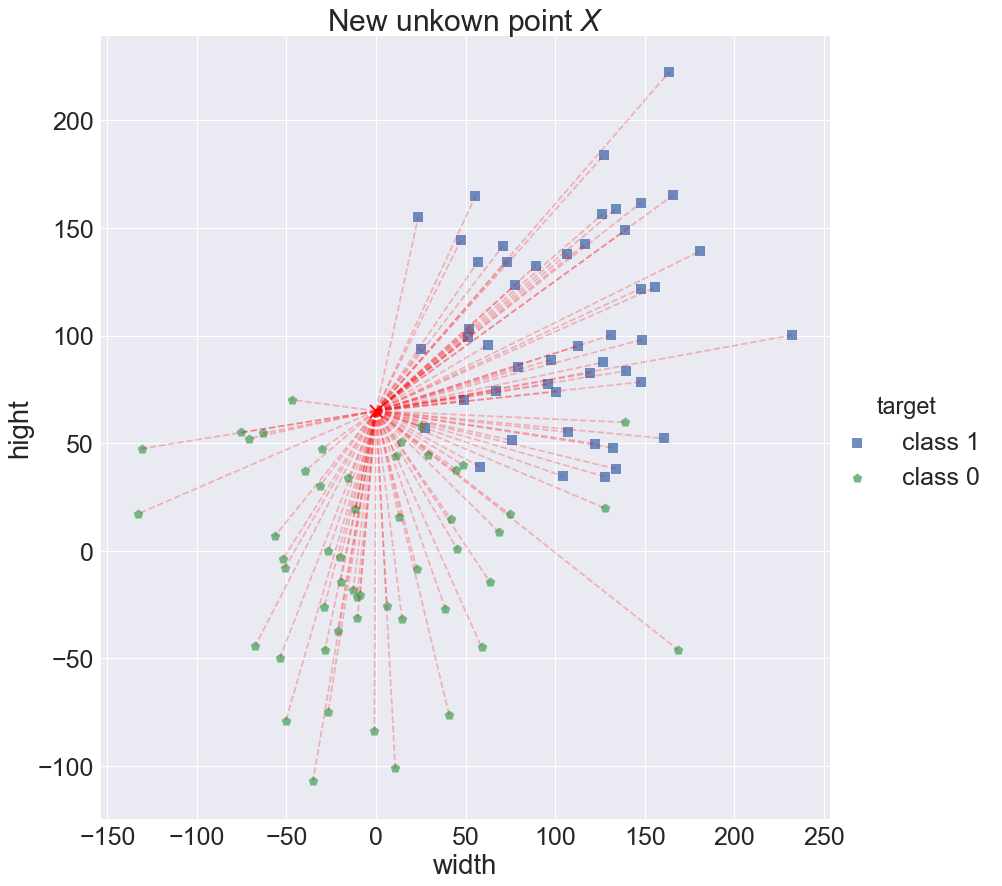

In [28]:
import matplotlib.pyplot as plt


# Plot scatter with 2 classes
sns.lmplot('width',
           'hight',
           markers=['s','p'],   ## here
           data=df,
           fit_reg=False,
           hue='target',
           size=12,
           scatter_kws={'s':100}); ## here

# Plot our new point
plt.title('New unkown point $X$')
plt.scatter(0, 65, color="red", marker="x", s=170);

# Plot distnace lines to all points to new unknown point!
for index, width, hight, target, distance in df.to_records(): # to convert dataframe to be able to loop in it
    plt.plot([0,hight], [65,width], '--' , alpha=.25, color='r' ) #[x1,x2] [y1,y2]


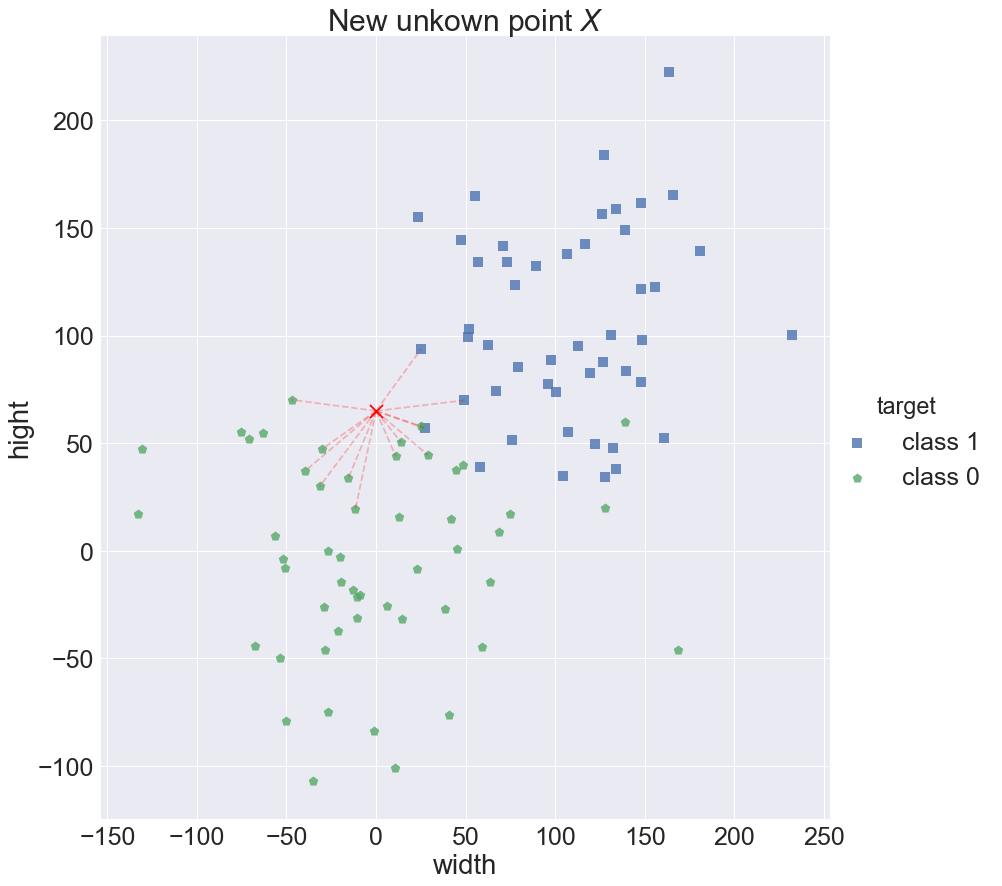

In [29]:
# Plot scatter with 2 classes
sns.lmplot('width',
           'hight',
           markers=['s','p'],   ## here
           data=df,
           fit_reg=False,
           hue='target',
           size=12,
           scatter_kws={'s':100}); ## here

# Plot our new point
plt.title('New unkown point $X$')
plt.scatter(0, 65, color="red", marker="x", s=170);

k = 13

for index, width, hight, target, distance in df.sort_values("distance").head(k).to_records():
    plt.plot([0,hight], [65,width], '--' , alpha=.25, color='r' )


### What does the hyperparameter $K$ do to bias / variance tradeoff in KNN?

/poll "What does the hyperparameter K do to bias?" "higher k = higer variance" "higher k = higher irreducable error" "higher k = higher bias" anonymous

In a thread (after a the majority of votes have been cast), what about variance?

<img src="./images/1nearestneigh.png" alt="1 nearest neigh" height="350" width="350">
<img src="./images/20nearestneigh.png" alt="20 nearest neigh" height="350" width="350">

### What about all those edge cases?

Well that's a grand question!

#### What if we have an equal amount of votes per class, to predict a point?
- We can weight the samples that are closer a point to have more value in the voting process.
- Using an odd quantity for $k$ can help avoid classes having the same score towards predicted points.

#### KNN seems pretty simple.  Is it?

If we're considering uniform distance value of distance (no weghted assumptions), with larger datasets, calculating the distances to known vs unknown points becomes very inefficient with larger datasets.  Even with weighted distances, KNN is still not very effecient.  In class we will worry abou this per-se, but in order to scale this algorithm for larger datasets, one of the main problems is efficient sampling of points closest to the unknown point to limit the number of distance calculations required.

## KNN in sklearn

We will load up a multinomial dataset having 3 classes.
- Inspect dataset using a pairplot in multiple dimensions
- Implement KNN in sklearn
- Search range of $K$ for optimal accuracy 

In [101]:
sns.set(font_scale=1.5) ## update font_scale to something more readable

In [30]:
# load iris dataset
iris = sns.load_dataset("iris")

In [1]:
iris.head()

###  Which features seem to create the clearest difference between classes?

In [2]:
# check correlation


In [3]:
# plot pairplot for all features


In [4]:
# Predictors X, and target y for our model


### Quick context:
**Petal** is the bright colorful bit of the flower.  
**Sepal** is the green bit that protects the petal before it blooms, and supports it afterwards.

<img src="./images/Petal-sepal.jpg" alt="Image courtesy of Wikipedia" height="350" width="350">

In [56]:
# Do train test split with 20% as test data


In [5]:
# Do Scaling for data


In [6]:
# Intialize our model


In [ ]:
# Score our model

In [7]:
# get best K


### Time Permitting - Explore Bias / Variance with "K" with new data on  your own!

Generally fewer number of neighbors will make your model learn to predict on the specific variance of our data (as a result of variance) and the boundaries / edges of classes will look more jagged but too many neighbors will not capture the general characteristics of your data (smoother edges and less distinction between classes -- less variance -- less distinction between classes). 

- Higher k will decrease variance and increase bias.
- Lower k will increase variance and decrease bias

A good way to choose K is to iterate on a few different models score, but also look at precion / recall / F1 in addition to score for each K to see how it  performs on accuracy, but also the other metrics that relate to each class.  Not only is overall accuracy important to understand, but also the rate of misclassfication / performance per each class.

> <img src="https://snag.gy/26k4Qa.jpg" width="500">
> Mainly, you're looking to find that "sweet spot" between bias and variance.  With a K too high or low, you're going to hit one side or the other of this trade-off.
